<a href="https://colab.research.google.com/github/KUNALKEDARI20/Neural-Network-/blob/main/Assignment_no_16_ForestFires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0


In [42]:
pip install keras==2.12.0

  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [43]:
#Import Libraries
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [44]:
df=pd.read_csv('/content/forestfires (1).csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [45]:
# Convert 'size_category' column using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['size_category'] = label_encoder.fit_transform(df['size_category'])
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
#Extraction of  impprtant features for prediction- X and Y
X=df.drop(columns=['month','day','area'],axis=1)
Y=df['area']

In [47]:
#Standarization for features
SS=StandardScaler()
X_scaled=SS.fit_transform(X)
X_scaled

array([[-0.80595947, -1.32332557, -1.83047676, ..., -0.17285971,
        -0.70608125,  0.60640322],
       [-0.00810203, -1.17954077,  0.48889092, ...,  5.78503817,
        -0.70608125,  0.60640322],
       [-0.00810203, -1.04982188,  0.56071545, ...,  5.78503817,
        -0.70608125,  0.60640322],
       ...,
       [-1.64008316, -0.84664771,  0.47476811, ..., -0.17285971,
        -0.70608125, -1.64906775],
       [ 0.68095666,  0.54900254,  0.26938221, ..., -0.17285971,
        -0.70608125,  0.60640322],
       [-2.02087875, -1.68591332, -1.78044169, ..., -0.17285971,
        -0.70608125,  0.60640322]])

In [87]:
# create model: Function Definition
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=X_scaled.shape[1], kernel_initializer='uniform', activation='relu')) # input layer
    #Dense is a NN, 12 - no. of neurons, i/p - 8 columns, kernel_initializer=uniform - bias or weights can be taken from uniform distribution.
    model.add(Dense(8,kernel_initializer='uniform', activation='relu')) # hidden layer
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))# output layer

    adam=Adam(learning_rate=0.01) # Adam is the optimizer from stochastic Gradient descent variant, lr - learning rate - eta
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    # using binary cross entropy find accuracy of model
    return model




---



---


**1].Hypertunning for-Batchsize and Epochs**

---



---



In [88]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0) # verbose=0 means don't print any information on screen

# Define the grid search parameters: Batch Size and epochs
batch_size = [10,20,40,30,40] # out of these 3 which is best value that we need to find using accuracy

# model will be built using 10 batch size once, then 20, then 40
epochs = [10,50,100,150,200,250] # makes all combinations all batch size and epochs

# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10) # by default it takes 5 K folds, verbose =10: displays 10 lines of epochs 1/12 for 10 times
grid_result = grid.fit(X_scaled,Y)
# batch size=3, epoch=4. 3*4=12, 12*5 folds = 60 models will be built


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START batch_size=10, epochs=10...................................
[CV 1/5; 1/30] END ....batch_size=10, epochs=10;, score=0.000 total time=   1.4s
[CV 2/5; 1/30] START batch_size=10, epochs=10...................................
[CV 2/5; 1/30] END ....batch_size=10, epochs=10;, score=0.000 total time=   1.4s
[CV 3/5; 1/30] START batch_size=10, epochs=10...................................
[CV 3/5; 1/30] END ....batch_size=10, epochs=10;, score=0.039 total time=   1.4s
[CV 4/5; 1/30] START batch_size=10, epochs=10...................................
[CV 4/5; 1/30] END ....batch_size=10, epochs=10;, score=0.000 total time=   1.5s
[CV 5/5; 1/30] START batch_size=10, epochs=10...................................
[CV 5/5; 1/30] END ....batch_size=10, epochs=10;, score=0.000 total time=   1.4s
[CV 1/5; 2/30] START batch_size=10, epochs=50...................................
[CV 1/5; 2/30] END ....batch_size=10, epochs=50

In [89]:
# Summarize the results - Let us find out which combination gave us the best result
print('Best :',grid_result.best_score_,'\n', 'using :',grid_result.best_params_)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params): #zip() maps means with mean, stds with stdev, params with param of format()
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.00776699036359787 
 using : {'batch_size': 10, 'epochs': 10}
0.00776699036359787,0.01553398072719574 with: {'batch_size': 10, 'epochs': 10}
0.00776699036359787,0.01553398072719574 with: {'batch_size': 10, 'epochs': 50}
0.00776699036359787,0.01553398072719574 with: {'batch_size': 10, 'epochs': 100}
0.00776699036359787,0.01553398072719574 with: {'batch_size': 10, 'epochs': 150}
0.00776699036359787,0.01553398072719574 with: {'batch_size': 10, 'epochs': 200}
0.00776699036359787,0.01553398072719574 with: {'batch_size': 10, 'epochs': 250}
0.00776699036359787,0.01553398072719574 with: {'batch_size': 20, 'epochs': 10}
0.00776699036359787,0.01553398072719574 with: {'batch_size': 20, 'epochs': 50}
0.00776699036359787,0.01553398072719574 with: {'batch_size': 20, 'epochs': 100}
0.00776699036359787,0.01553398072719574 with: {'batch_size': 20, 'epochs': 150}
0.00776699036359787,0.01553398072719574 with: {'batch_size': 20, 'epochs': 200}
0.00776699036359787,0.01553398072719574 with: {'batch_



---



---
**2].Hypertunning for-Number of neurons-hidden layers**

---



---




In [90]:
def create_model (neuron1,neuron2):
  model=Sequential()
  model.add(Dense(neuron1,activation='linear',input_dim=X_scaled.shape[1]))
  model.add(Dense(neuron2,activation='linear'))
  model.add(Dense(1,activation='sigmoid'))

  adam=Adam(learning_rate=0.001)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
  return model

In [91]:
#Create the model

model=KerasClassifier(build_fn=create_model,verbose=0,epochs=10,batch_size=20)

#GridSearch Parameters
neuron1=[4,8,12,16,20] # input layers neurons
neuron2=[2,4,6,8,10]   # hidden layers neurons

#Dictionary of params_grid
params_grid=dict(neuron1=neuron1,neuron2=neuron2)

#Built and fit model
grid=GridSearchCV(estimator=model,param_grid=params_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(X_scaled,Y)




Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5; 1/25] START neuron1=4, neuron2=2.......................................
[CV 1/5; 1/25] END ........neuron1=4, neuron2=2;, score=0.346 total time=   1.7s
[CV 2/5; 1/25] START neuron1=4, neuron2=2.......................................
[CV 2/5; 1/25] END ........neuron1=4, neuron2=2;, score=0.144 total time=   1.5s
[CV 3/5; 1/25] START neuron1=4, neuron2=2.......................................
[CV 3/5; 1/25] END ........neuron1=4, neuron2=2;, score=0.136 total time=   1.1s
[CV 4/5; 1/25] START neuron1=4, neuron2=2.......................................
[CV 4/5; 1/25] END ........neuron1=4, neuron2=2;, score=0.155 total time=   1.1s
[CV 5/5; 1/25] START neuron1=4, neuron2=2.......................................
[CV 5/5; 1/25] END ........neuron1=4, neuron2=2;, score=0.194 total time=   1.4s
[CV 1/5; 2/25] START neuron1=4, neuron2=4.......................................
[CV 1/5; 2/25] END ........neuron1=4, neuron2=4

In [92]:
#Summarize results-hyper tunning of neurons
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))


Best : 0.28226287961006163, using {'neuron1': 20, 'neuron2': 10}
0.1951643019914627,0.07808796476620916 with: {'neuron1': 4, 'neuron2': 2}
0.1391523525118828,0.05335291375049037 with: {'neuron1': 4, 'neuron2': 4}
0.18342045992612838,0.09525397183574404 with: {'neuron1': 4, 'neuron2': 6}
0.2301530972123146,0.07832633646583682 with: {'neuron1': 4, 'neuron2': 8}
0.17007094919681548,0.060046921481975976 with: {'neuron1': 4, 'neuron2': 10}
0.17979835271835326,0.04400062335070169 with: {'neuron1': 8, 'neuron2': 2}
0.2550784170627594,0.09981547895329113 with: {'neuron1': 8, 'neuron2': 4}
0.20117625147104262,0.07443826595207613 with: {'neuron1': 8, 'neuron2': 6}
0.2418782740831375,0.06796973459686001 with: {'neuron1': 8, 'neuron2': 8}
0.23024645149707795,0.07435604846602835 with: {'neuron1': 8, 'neuron2': 10}
0.21461911797523497,0.08772642529038696 with: {'neuron1': 12, 'neuron2': 2}
0.24947721958160402,0.07659265101534454 with: {'neuron1': 12, 'neuron2': 4}
0.23986184000968933,0.0707516077230



---



---
**3].Hypertunning of -Activation function**


---



---




In [93]:
def create_model (activation_function):
  model=Sequential()
  model.add(Dense(20,activation=activation_function,input_dim=X_scaled.shape[1]))
  model.add(Dense(10,activation=activation_function))
  model.add(Dense(1,activation='sigmoid'))

  adam=Adam(learning_rate=0.001)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
  return model

In [95]:
#Create Model
model=KerasClassifier(build_fn=create_model,epochs=10,batch_size=10,verbose=0)

#Define Activation function
activation_function=['linear','tanh','relu','softplus','softmax']

#Dictionary of grid search paramater
param_grid=dict(activation_function=activation_function)

#Built and fit GridSearchCV
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(X_scaled,Y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5; 1/5] START activation_function=linear..................................
[CV 1/5; 1/5] END ...activation_function=linear;, score=0.250 total time=   2.1s
[CV 2/5; 1/5] START activation_function=linear..................................
[CV 2/5; 1/5] END ...activation_function=linear;, score=0.183 total time=   1.4s
[CV 3/5; 1/5] START activation_function=linear..................................
[CV 3/5; 1/5] END ...activation_function=linear;, score=0.155 total time=   2.1s
[CV 4/5; 1/5] START activation_function=linear..................................
[CV 4/5; 1/5] END ...activation_function=linear;, score=0.223 total time=   2.1s
[CV 5/5; 1/5] START activation_function=linear..................................
[CV 5/5; 1/5] END ...activation_function=linear;, score=0.301 total time=   2.1s
[CV 1/5; 2/5] START activation_function=tanh....................................
[CV 1/5; 2/5] END .....activation_function=tanh;,

In [96]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.2224607914686203, using {'activation_function': 'linear'}
0.2224607914686203,0.05100922923120441 with: {'activation_function': 'linear'}
0.038704256899654864,0.02028612264578149 with: {'activation_function': 'tanh'}
0.00969006735831499,0.015040758517125401 with: {'activation_function': 'relu'}
0.00776699036359787,0.01553398072719574 with: {'activation_function': 'softplus'}
0.00776699036359787,0.01553398072719574 with: {'activation_function': 'softmax'}




---



---


**4].Hypertunning for-Learning rate and dropout**

---

---






In [99]:
from keras.layers import Dropout
# drop out rate - to control the accuracy. To overcome overfit of model randomly remove connection of some neurons
# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(20,input_dim =X_scaled.shape[1],activation = 'linear'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8,input_dim =X_scaled.shape[1],activation = 'linear'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model


In [100]:
# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters: Learning rate and dropout rate are the hyperparameters we want to test

learning_rate = [0.001,0.01,0.1,0.02,1]
dropout_rate = [0.0,0.1,0.2,0.3]# drop 0%,10%, 20% neurons

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10) # total (3*3)*5 default folds=45 models will be built. (Lrate 3 values, Dropout rate =3, 3*3=9,)
grid_result = grid.fit(X_scaled,Y)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START dropout_rate=0.0, learning_rate=0.001......................
[CV 1/5; 1/20] END dropout_rate=0.0, learning_rate=0.001;, score=0.462 total time=   1.0s
[CV 2/5; 1/20] START dropout_rate=0.0, learning_rate=0.001......................
[CV 2/5; 1/20] END dropout_rate=0.0, learning_rate=0.001;, score=0.221 total time=   1.0s
[CV 3/5; 1/20] START dropout_rate=0.0, learning_rate=0.001......................
[CV 3/5; 1/20] END dropout_rate=0.0, learning_rate=0.001;, score=0.155 total time=   1.1s
[CV 4/5; 1/20] START dropout_rate=0.0, learning_rate=0.001......................
[CV 4/5; 1/20] END dropout_rate=0.0, learning_rate=0.001;, score=0.223 total time=   1.1s
[CV 5/5; 1/20] START dropout_rate=0.0, learning_rate=0.001......................
[CV 5/5; 1/20] END dropout_rate=0.0, learning_rate=0.001;, score=0.359 total time=   1.0s
[CV 1/5; 2/20] START dropout_rate=0.0, learning_rate=0.01.......................
[C

In [101]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.28411127626895905, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.28411127626895905,0.11078433824450751 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.2784727394580841,0.0922939882697469 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.2727221786975861,0.08281453574526396 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.2707244247198105,0.08191833835766345 with: {'dropout_rate': 0.0, 'learning_rate': 0.02}
0.2727221786975861,0.0781291946221098 with: {'dropout_rate': 0.0, 'learning_rate': 1}
0.2300597459077835,0.06982208049657845 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.2727035105228424,0.0780211212013968 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.27654966711997986,0.08282148917211335 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.2765683352947235,0.09108176740845025 with: {'dropout_rate': 0.1, 'learning_rate': 0.02}
0.2707991063594818,0.0761547960201659 with: {'dropout_rate': 0.1, 'learning_rate': 1}
0.2550784140825272,0.1153569

#Final model building using all best hyperparameter

In [102]:
#Final model
model=Sequential()
model.add(Dense(20,activation='linear',input_dim=X_scaled.shape[1])) #1st layer-input layer
model.add(Dropout(0.0))
model.add(Dense(10,activation='linear')) # 2nd layer-hidden layer
model.add(Dropout(0.0))
model.add(Dense(1,activation='sigmoid')) # 3rd layer-output layer


In [103]:
# Compile the model with the best learning rate obtained
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# binary_crossentropy - Computes the crossentropy metric between the labels and predictions.
# This is the crossentropy metric class to be used when there are only two label classes (0 and 1)


In [104]:
#Train the model using entire train dataset
history=model.fit(X,Y,batch_size=10,epochs=10,verbose=1,validation_split=0.3)


Epoch 1/10
37/37 [==============================] - 1s 9ms/step - loss: 114.4922 - accuracy: 0.1524 - val_loss: -2305.3110 - val_accuracy: 0.0000e+00
Epoch 2/10
37/37 [==============================] - 0s 4ms/step - loss: -2241.4810 - accuracy: 0.0000e+00 - val_loss: -5977.6089 - val_accuracy: 0.0000e+00
Epoch 3/10
37/37 [==============================] - 0s 3ms/step - loss: -4527.6934 - accuracy: 0.0000e+00 - val_loss: -10612.3770 - val_accuracy: 0.0000e+00
Epoch 4/10
37/37 [==============================] - 0s 3ms/step - loss: -7929.9448 - accuracy: 0.0000e+00 - val_loss: -16105.6621 - val_accuracy: 0.0000e+00
Epoch 5/10
37/37 [==============================] - 0s 3ms/step - loss: -12196.0918 - accuracy: 0.0000e+00 - val_loss: -24914.7090 - val_accuracy: 0.0000e+00
Epoch 6/10
37/37 [==============================] - 0s 4ms/step - loss: -18485.8379 - accuracy: 0.0000e+00 - val_loss: -34864.5781 - val_accuracy: 0.0000e+00
Epoch 7/10
37/37 [==============================] - 0s 3ms/step 

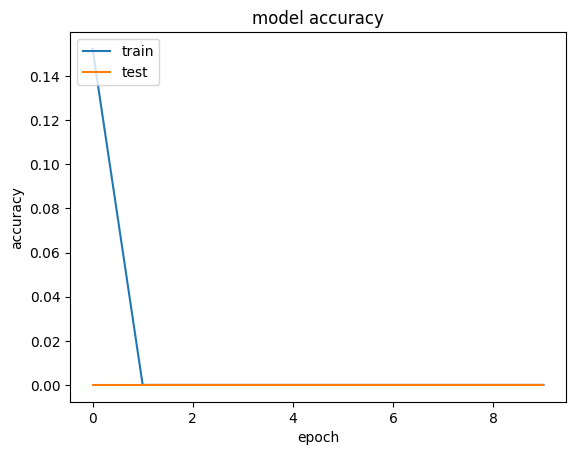

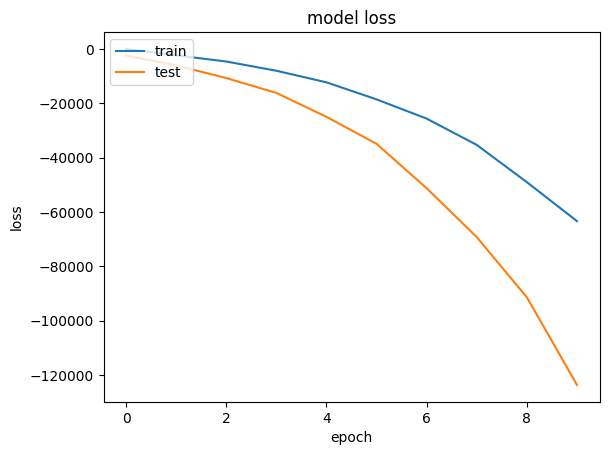

In [105]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()